# Cost Matrices

In [1]:
import numpy as np
import seaborn as sns
sns.set()
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
import pickle
from parfor import parfor
import time

## Main Cost Matrix Function

In [67]:
def cost_matrix(file_name):
    with open(file_name,'rb') as f:
        out = pickle.load(f)

    players = dict()

    for o in out:
        for p in o.keys():
            if p not in players:
                players[p] = len(players)

    n = len(players)
    game_matrix = np.zeros((n,n))

    for o in out:
        for p1 in o.keys():
            for p2 in o[p1].keys():
                idx1 = players[p1]
                idx2 = players[p2]

                rews = np.array(o[p1][p2])
                win_prob = (rews[:,0]>0).mean()
                game_matrix[idx1][idx2] = win_prob
                
    plt.grid(False)
    plt.imshow(game_matrix.transpose(), vmin=0, vmax=1)
    plt.xlabel('Player 1')
    plt.ylabel('Player 2')
    colour = 'darkturquoise'
    plt.xticks([0,48])
    plt.yticks([0,48])

    plt.axvline(x=23.5, color=colour)
    plt.axhline(y=23.5, color=colour)
    textloc = [3.5, 11, 27.5, 35]
    text_spacing = 3
    textsize = 13
    plt.text(textloc[0], textloc[1], 'P1: Random', color=colour).set_size(textsize)
    plt.text(textloc[0], textloc[1]+text_spacing, 'P2: Random', color=colour).set_size(textsize)
    plt.text(textloc[2], textloc[1], 'P1: Random', color=colour).set_size(textsize)
    plt.text(textloc[2], textloc[1]+text_spacing, 'P2: Random', color=colour).set_size(textsize)
    plt.text(textloc[0], textloc[3], 'P1: Random', color=colour).set_size(textsize)
    plt.text(textloc[0], textloc[3]+text_spacing, 'P2: Random', color=colour).set_size(textsize)
    plt.text(textloc[2], textloc[3], 'P1: Random', color=colour).set_size(textsize)
    plt.text(textloc[2], textloc[3]+text_spacing, 'P2: Random', color=colour).set_size(textsize)
    cbr = plt.colorbar()
    cbr.set_label('Player 1 Win Probability',  labelpad=15)

## File Location

In [68]:
file_loc = "C:/Users/drago/OneDrive - UW/Ratliff Research/tournaments/"

## Gridhunter Cost Matrices

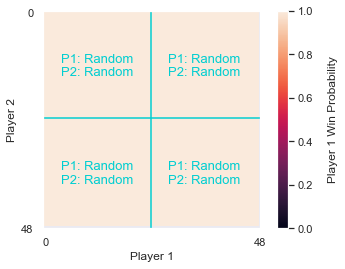

In [69]:
# Input Tournament Data File
pklfile = "gridhunterOut.pkl"
file_name = file_loc + pklfile

cost_matrix(file_name)

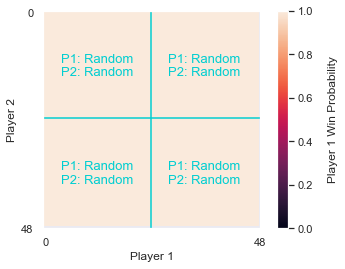

In [70]:
# Input Tournament Data File
pklfile = "gridRand1.pkl"
file_name = file_loc + pklfile

cost_matrix(file_name)

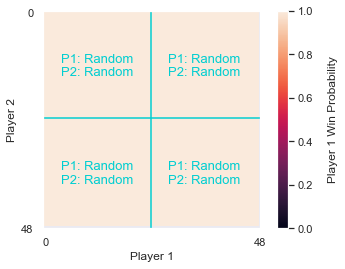

In [71]:
pklfile = "gridRand2.pkl"
file_name = file_loc + pklfile

cost_matrix(file_name)

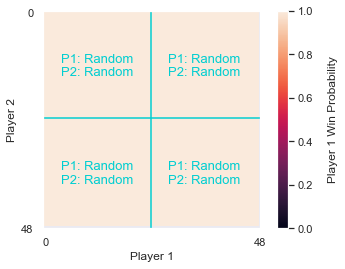

In [72]:
pklfile = "gridRandRand.pkl"
file_name = file_loc + pklfile

cost_matrix(file_name)

## Soccer Cost Matrices

In [73]:
pklfile = "soccer.pkl"
file_name = file_loc + pklfile

cost_matrix(file_name)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/drago/OneDrive - UW/Ratliff Research/tournaments/soccer.pkl'

In [ ]:
pklfile = "soccerRand1.pkl"
file_name = file_loc + pklfile

cost_matrix(file_name)

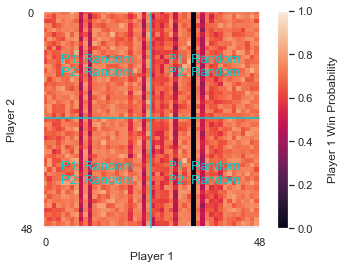

In [74]:
pklfile = "soccerRand2.pkl"
file_name = file_loc + pklfile

cost_matrix(file_name)

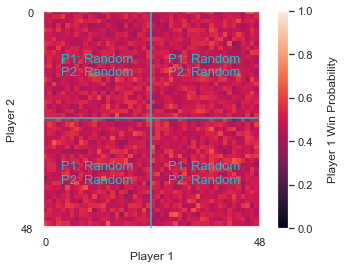

In [75]:
pklfile = "soccerRandRand.pkl"
file_name = file_loc + pklfile

cost_matrix(file_name)